<a href="https://colab.research.google.com/github/AhmedNasser1601/Stock-Analysis/blob/Main/Stock_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Name: Ahmed Nasser Ahmed Hassan***
> **CodeClause |> *Sep/2022***
>> **Data Science Intern |> *CC-OL-911***
>>> **Task1 >> *Stock Analysis***
---

> ### |> ***Requirements***

>> #### |> ***Install Libraries***

In [1]:
!pip install pandas-datareader
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


>> #### |> ***Import Packages***

In [2]:
import sys
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data

from sklearn.preprocessing import MinMaxScaler

from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

> ### |> ***Download Dataset***

>> #### |> ***Get Dataset from Kaggle with API_Token***
>> - "username":"ahmednasser1601"
>> - "key":"fd950b67a38861322900a50fdc9f6881"

In [3]:
!mkdir ~/.kaggle
!touch ~/.kaggle/kaggle.json

api_token = {"username":"ahmednasser1601","key":"fd950b67a38861322900a50fdc9f6881"}

with open('/root/.kaggle/kaggle.json', 'w') as file:
    json.dump(api_token, file)

!chmod 600 ~/.kaggle/kaggle.json

>> #### |> ***Download Dataset file***

In [4]:
!kaggle datasets download vijayvvenkitesh/microsoft-stock-time-series-analysis -f Microsoft_Stock.csv

dataset = pd.read_csv('Microsoft_Stock.csv')
dataset

  0% 0.00/79.8k [00:00<?, ?B/s]
100% 79.8k/79.8k [00:00<00:00, 55.6MB/s]


,Date,Open,High,Low,Close,Volume
0,4/1/2015 16:00:00,40.60,40.76,40.31,40.72,36865322
1,4/2/2015 16:00:00,40.66,40.74,40.12,40.29,37487476
2,4/6/2015 16:00:00,40.34,41.78,40.18,41.55,39223692
3,4/7/2015 16:00:00,41.61,41.91,41.31,41.53,28809375
4,4/8/2015 16:00:00,41.48,41.69,41.04,41.42,24753438
...,...,...,...,...,...,...
1506,3/25/2021 16:00:00,235.30,236.94,231.57,232.34,34061853
1507,3/26/2021 16:00:00,231.55,236.71,231.55,236.48,25479853
1508,3/29/2021 16:00:00,236.59,236.80,231.88,235.24,25227455
1509,3/30/2021 16:00:00,233.53,233.85,231.10,231.85,24792012


---

> ### |> ***Exploring the Data***

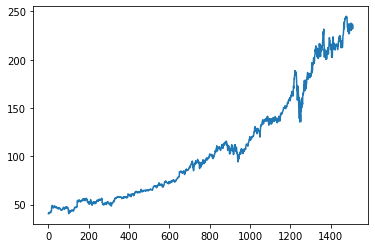

In [5]:
plt.plot(dataset.Close)

In [6]:
df = dataset.drop(['Date'], axis = 1)
df.head()

,Open,High,Low,Close,Volume
0,40.60,40.76,40.31,40.72,36865322
1,40.66,40.74,40.12,40.29,37487476
2,40.34,41.78,40.18,41.55,39223692
3,41.61,41.91,41.31,41.53,28809375
4,41.48,41.69,41.04,41.42,24753438


In [7]:
avg1 = df.Close.rolling(100).mean()   #100 Days
avg2 = df.Close.rolling(200).mean()   #200 Days

avg1

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
1506    224.9441
1507    225.2842
1508    225.6133
1509    225.8675
1510    226.0613
Name: Close, Length: 1511, dtype: float64

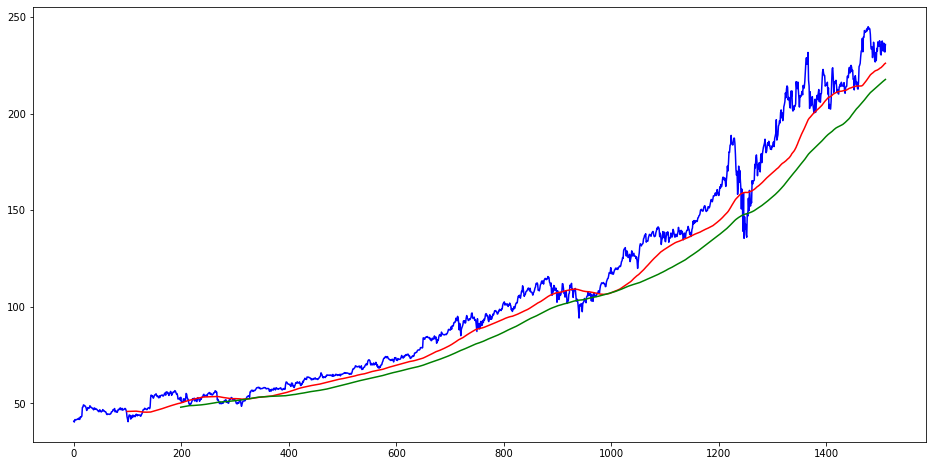

In [8]:
plt.figure(figsize = (16,8))
plt.plot(df.Close,'blue')
plt.plot(avg1,'red')
plt.plot(avg2,'green')

---

> ### |> ***Data Processing***

>> #### |> ***Splitting [Train >< Test]***

In [9]:
trainSplit = 70/100     #Training Percentage

trainData = pd.DataFrame(df['Close'][0 : int(len(df)*trainSplit)])
testData = pd.DataFrame(df['Close'][int(len(df)*trainSplit) : int(len(df))])

print('Training', trainData.shape, '   |   ', 'Testing', testData.shape)

trainData

Training (1057, 1)    |    Testing (454, 1)


,Close
0,40.72
1,40.29
2,41.55
3,41.53
4,41.42
...,...
1052,127.82
1053,131.40
1054,132.60
1055,132.10


>> #### |> ***Scaling [0 < Data < 1]***

In [10]:
dataScaler = MinMaxScaler(feature_range = (0, 1))

trainData_arr = dataScaler.fit_transform(trainData)

print('Training Data:', trainData_arr.shape)
trainData_arr

Training Data: (1057, 1)


array([[0.00465822],
       [0.        ],
       [0.01364966],
       ...,
       [1.        ],
       [0.99458347],
       [0.9879753 ]])

In [11]:
xTrain = []
yTrain = []

for i in range(100, trainData_arr.shape[0]):
    xTrain.append(trainData_arr[i-100 : i])
    yTrain.append(trainData_arr[i,0])
    
xTrain, yTrain = np.array(xTrain), np.array(yTrain)

---

> ### |> ***ML Model Building***

In [12]:
model = Sequential()

model.add(LSTM(units = 50, activation = 'relu', return_sequences = True, input_shape = (xTrain.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [13]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(xTrain, yTrain, epochs = 100)

Epoch 1/100
30/30 [==============================] - 34s 761ms/step - loss: 0.0822
Epoch 2/100
30/30 [==============================] - 19s 618ms/step - loss: 0.0141
Epoch 3/100
30/30 [==============================] - 20s 652ms/step - loss: 0.0094
Epoch 4/100
30/30 [==============================] - 19s 629ms/step - loss: 0.0086
Epoch 5/100
30/30 [==============================] - 22s 736ms/step - loss: 0.0077
Epoch 6/100
30/30 [==============================] - 19s 634ms/step - loss: 0.0065
Epoch 7/100
30/30 [==============================] - 19s 640ms/step - loss: 0.0066
Epoch 8/100
30/30 [==============================] - 19s 637ms/step - loss: 0.0075
Epoch 9/100
30/30 [==============================] - 19s 628ms/step - loss: 0.0062
Epoch 10/100
30/30 [==============================] - 19s 630ms/step - loss: 0.0065
Epoch 11/100
30/30 [==============================] - 19s 641ms/step - loss: 0.0063
Epoch 12/100
30/30 [==============================] - 20s 673ms/step - loss: 0.0064
E

In [14]:
model.save('Model.h5')
print('Model.h5 file is saved successfully')

Model.h5 file is saved successfully


---

> ### |> ***Testing the Model***

In [15]:
Last100Days = trainData.tail(100)
finalDF = Last100Days.append(testData, ignore_index=True)

inputData = dataScaler.fit_transform(finalDF)
inputData.shape

(554, 1)

In [16]:
xTest = []
yTest = []

for i in range(100, inputData.shape[0]):
    xTest.append(inputData[i-100 : i])
    yTest.append(inputData[i, 0])

xTest, yTest = np.array(xTest), np.array(yTest)
print(xTest.shape, '   |   ', yTest.shape)

(454, 100, 1)    |    (454,)


In [17]:
yPredict = model.predict(xTest)   #Get Predictions
yPredict.shape

(454, 1)

In [18]:
dataScaler.scale_

array([0.00703185])

In [19]:
scaleFactor = 1/0.03199539
yPredict *= scaleFactor
yTest *= scaleFactor

> ### |> ***Plotting [Original vs Predicted]***

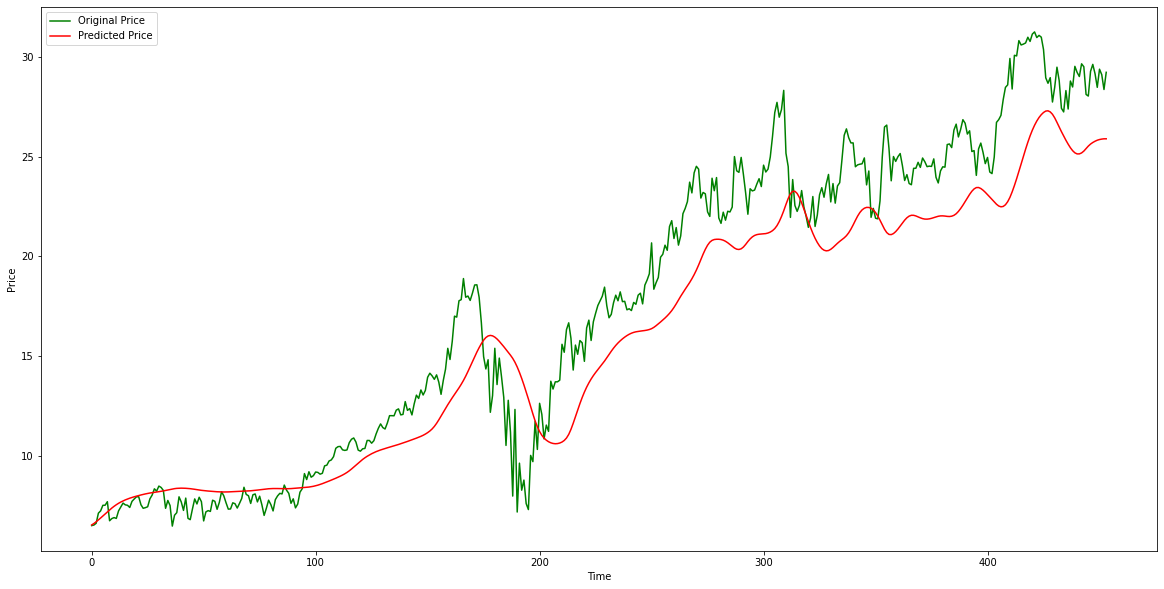

In [26]:
plt.figure(figsize = (20,10))
plt.plot(yTest, 'green', label = 'Original Price')
plt.plot(yPredict, 'red', label = 'Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()

plt.show()

---